# Kaggle Competition Titanic Dataset Learning

In [1]:
TRAINNAME = "train.csv"
TESTNAME = "test.csv"

## Load Data

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

def readTrainData():
    return pd.read_csv(TRAINNAME)
def readTestData():
    return pd.read_csv(TESTNAME)

In [3]:
data = readTrainData()

## Data Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Cleaning Data
https://corpocrat.com/2014/08/29/tutorial-titanic-dataset-machine-learning-for-kaggle/

Need to convert the text fields into numbers to train on

In [7]:
data.drop('PassengerId', axis=1, inplace=True)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#data = data.dropna()

In [9]:
from sklearn.preprocessing import LabelEncoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [10]:
data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = data['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [11]:
data['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = data.Age[(data["Age"] != -1) & (data['Name'] == title)].median()
    medians[title] = median
    
for index, row in data.iterrows():
    if row['Age'] == -1:
        data.loc[index, 'Age'] = medians[row['Name']]

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [12]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

data['Name'] = data['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
data['Name'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))

In [13]:
data.head()[['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]

,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,3,22.0,1,0,A/5 21171,NaN,S
1,1,38.0,1,0,PC 17599,C85,C
2,3,26.0,0,0,STON/O2. 3101282,NaN,S
3,1,35.0,1,0,113803,C123,S
4,3,35.0,0,0,373450,NaN,S


In [14]:
data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))

In [15]:
data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in data['Pclass'].unique():
    median = data.Fare[(data["Fare"] != -1) & (data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in data.iterrows():
    if row['Fare'] == -1:
        data.loc[index, 'Fare'] = medians[row['Pclass']]
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))

In [16]:
data['Pclass'] = StandardScaler().fit_transform(data['Pclass'].values.reshape(-1, 1))

In [17]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
data['Parch'] = data['Parch'].apply(lambda x: replacement.get(x))
data['Parch'] = StandardScaler().fit_transform(data['Parch'].values.reshape(-1, 1))

In [18]:
data.drop('Ticket', axis=1, inplace=True)

In [19]:
data['Embarked'].fillna('S', inplace=True)

In [20]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data['Embarked'] = data['Embarked'].apply(lambda x: replacement.get(x))
data['Embarked'] = StandardScaler().fit_transform(data['Embarked'].values.reshape(-1, 1))
data.head()['Embarked']

0   -0.585954
1    1.942303
2   -0.585954
3   -0.585954
4   -0.585954
Name: Embarked, dtype: float64

In [31]:
data['SibSp'].unique()

array([ 1.57610866, -0.3962408 , -1.38241553, -2.36859026,  0.58993393,
       -3.35476499])

In [21]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

data['SibSp'] = data['SibSp'].apply(lambda x: replacement.get(x))
data['SibSp'] = StandardScaler().fit_transform(data['SibSp'].values.reshape(-1, 1))
data.head()['SibSp']

0    1.576109
1    1.576109
2   -0.396241
3    1.576109
4   -0.396241
Name: SibSp, dtype: float64

In [22]:
data['Cabin'].fillna('U', inplace=True)
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data['Cabin'] = data['Cabin'].apply(lambda x: replacement.get(x))
data['Cabin'] = StandardScaler().fit_transform(data['Cabin'].values.reshape(-1, 1))
data.head()['Cabin']

0   -0.494813
1    0.960231
2   -0.494813
3    0.960231
4   -0.494813
Name: Cabin, dtype: float64

## Split Data

| Data            | Data, Labels     |
|-----------------|------------------|
| Training Data   | X_train, y_train |
| Validation Data | X_val, y_val     |
| Test Data       | X_test           |

In [24]:
#X_train_val = data.drop("Survived", axis=1)
#y_train_val = data["Survived"].copy()

In [25]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(
#    X_train_val, y_train_val, test_size=150, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
survived = data['Survived']
data.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.2, random_state=42)

In [27]:
#X_test = readTestData()

## Analysing Data

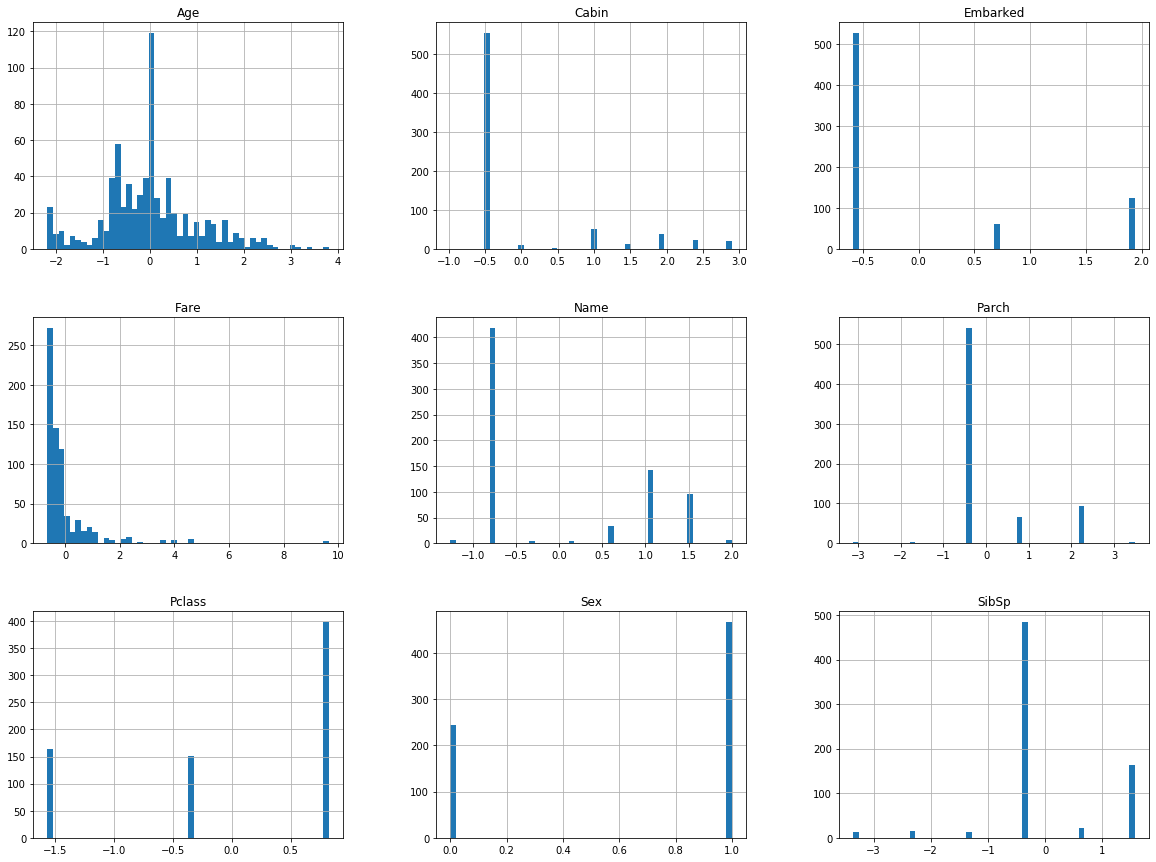

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
#corr_matrix = data.corr()
#corr_matrix["Survived"].sort_values(ascending=False)

## Learning

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.8212290502793296
0.8156424581005587


/Users/Duncan/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
